In [1]:
import pandas as pd
import numpy as np
import pickle
import spacy
import time

In [2]:
#!pip install spacy

In [3]:
#!python -m spacy download ru_core_news_lg

In [2]:
df_filtered = pd.read_pickle("df_filtered.pkl")
df_filtered

,text,OKPD2,1_step,2_steps,3_steps,4_steps
0,укроп свежий,01.13.19.000,1,113,11319,11319000
1,яблоки,01.24.10.000,1,124,12410,12410000
2,капуста брокколи,01.13.13.000,1,113,11313,11313000
3,морковь столовая,01.13.41.110,1,113,11341,11341110
4,яйца куриные в скорлупе свежие,01.47.21.000,1,147,14721,14721000
...,...,...,...,...,...,...
8558341,ш-15 (р-152) ежегодное освидетельствование\r\n,99.00.10.000,99,9900,990010,990010000
8558342,кпл-1 (р-99) наружное освидетельствование сосу...,99.00.10.000,99,9900,990010,990010000
8558343,жулан (391а) внеочередное освидетельствование....,99.00.10.000,99,9900,990010,990010000
8558344,дтс-2 (306к) ежегодное освидетельствование\r\n,99.00.10.000,99,9900,990010,990010000


In [3]:
def extract_first_two_digits(number):
    return int(str(number)[:-1])
def extract_first_four_digits(number):
    return int(str(number)[:-1])

df_filtered.insert(3, '1.5_steps', df_filtered['2_steps'].apply(extract_first_two_digits))
df_filtered.insert(5, '2.5_steps', df_filtered['3_steps'].apply(extract_first_four_digits))

In [6]:
df_filtered.groupby('1_step')['text'].count().sort_values()

1_step
99       205
50       303
3        676
69      1032
66      1038
       ...  
45    249196
33    249350
86    249564
35    249752
81    250000
Name: text, Length: 81, dtype: int64

Принято решение взять насыщенные ступени 33 и 45, близкие по смыслу
ТЕПЕРЬ ДОБАВИМ ЕЩЁ 81 и 86 категории

In [7]:
t = df_filtered[df_filtered['1_step']==33]
t = pd.concat([t, df_filtered[df_filtered['1_step']==45]])
t = pd.concat([t, df_filtered[df_filtered['1_step']==81]])
t = pd.concat([t, df_filtered[df_filtered['1_step']==86]])

In [8]:
t

,text,OKPD2,1_step,1.5_steps,2_steps,2.5_steps,3_steps,4_steps
3842107,обслуживание системы электропитания (ббп+ак.ба...,33.13.19.000,33,331,3313,33131,331319,331319000
3842108,оказание услуг по техническому обслуживанию и ...,33.13.12.000,33,331,3313,33131,331312,331312000
3842109,техническое обслуживание; эл.кардиограф kenz-...,33.12.20.000,33,331,3312,33122,331220,331220000
3842110,"микродвигатель (камера холодильная кх 4,4 куб ...",33.12.29.900,33,331,3312,33122,331229,331229900
3842111,оказание услуг по техническому обслуживанию от...,33.13.12.000,33,331,3313,33131,331312,331312000
...,...,...,...,...,...,...,...,...
8182489,"антитела к описторхам (opisthorchis felineus),...",86.90.15.000,86,869,8690,86901,869015,869015000
8182490,исследование антител к антигенам групп крови,86.90.15.000,86,869,8690,86901,869015,869015000
8182491,giardia lamblia,86.90.15.000,86,869,8690,86901,869015,869015000
8182492,врач - офтальмолог,86.21.10.190,86,862,8621,86211,862110,862110190


#### Checkpoint

In [ ]:
save_frame = pd.read_pickle("embeddings_33_45_81_86.pickle")

In [27]:
save_frame

,text,OKPD2,1_step,1.5_steps,2_steps,3_steps,4_steps,embedding
3842107,обслуживание системы электропитания (ббп+ак.ба...,33.13.19.000,33,331,3313,331319,331319000,"[-0.039407022, -0.10134085, -0.07014883, -0.21..."
3842108,оказание услуг по техническому обслуживанию и ...,33.13.12.000,33,331,3313,331312,331312000,"[0.1619602, -0.06137026, -0.062573925, -0.0257..."
3842109,техническое обслуживание; эл.кардиограф kenz-...,33.12.20.000,33,331,3312,331220,331220000,"[0.026998501, -0.054747988, -0.012029841, -0.0..."
3842110,"микродвигатель (камера холодильная кх 4,4 куб ...",33.12.29.900,33,331,3312,331229,331229900,"[0.097958766, 0.14001635, 0.04124324, -0.13096..."
3842111,оказание услуг по техническому обслуживанию от...,33.13.12.000,33,331,3313,331312,331312000,"[0.21445446, 0.080261864, -0.020968242, 0.0262..."
...,...,...,...,...,...,...,...,...
8182489,"антитела к описторхам (opisthorchis felineus),...",86.90.15.000,86,869,8690,869015,869015000,"[-0.12573978, -0.010270779, 0.044136684, -0.01..."
8182490,исследование антител к антигенам групп крови,86.90.15.000,86,869,8690,869015,869015000,"[-0.1875614, 0.2979328, -0.25100502, 0.1021310..."
8182491,giardia lamblia,86.90.15.000,86,869,8690,869015,869015000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8182492,врач - офтальмолог,86.21.10.190,86,862,8621,862110,862110190,"[0.24621332, 0.2858546, 0.20939036, -0.0491004..."


#### 1.5_steps

In [32]:
labels = save_frame['1.5_steps']

In [33]:
len(set(labels))

11

Разбиение выборки на train и test

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(list(save_frame['embedding']), labels, test_size=0.2, random_state=42)

Лог регрессия из sklearn

In [35]:
from sklearn.linear_model import LogisticRegression

start_time = time.time()
model = LogisticRegression(multi_class='ovr', solver ='newton-cg' )
model.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 856.7557234764099 seconds ---


Построение ROC кривой

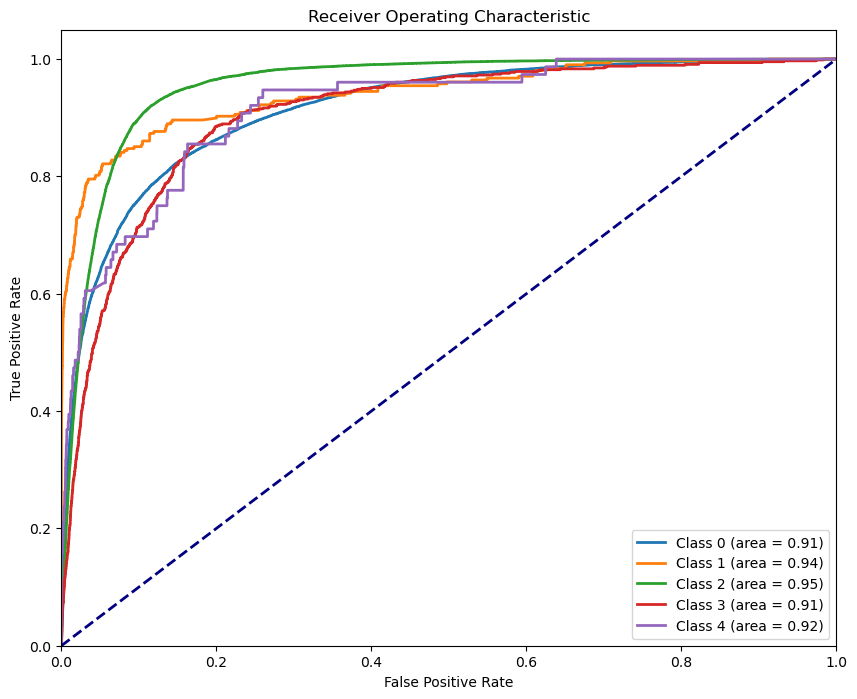

In [36]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Бинаризация меток для многоклассовой классификации
y_test_binarized = label_binarize(y_test, classes=np.unique(labels))

# Предсказание вероятностей для всех классов
y_score = model.predict_proba(X_test)

# Вычисление параметров ROC-кривых для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение ROC-кривых для всех классов
plt.figure(figsize=(10, 8))

classes_to_see = [0,1, 2, 3, 4]
for i in classes_to_see: # range(y_test_binarized.shape[1])
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {} (area = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



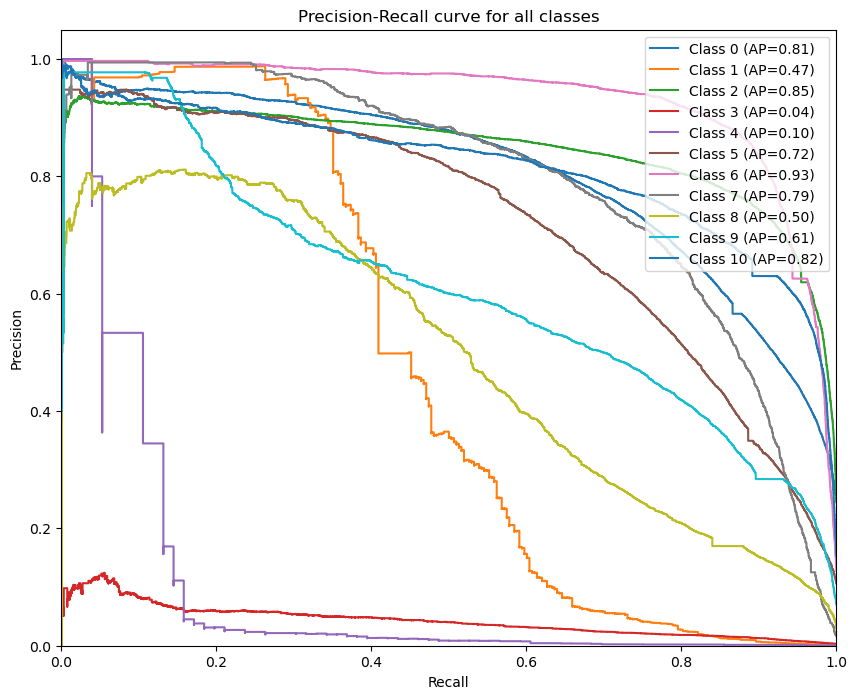

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Расчет кривых точности и полноты для каждого класса
precision = dict()
recall = dict()
average_precision = dict()
for i in range(y_test_binarized.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_score[:, i])

# Построение графиков кривых точности-полноты для всех классов
plt.figure(figsize=(10, 8))
for i in range(y_test_binarized.shape[1]):
    plt.step(recall[i], precision[i], where='post', 
             label='Class {} (AP={:.2f})'.format(i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve for all classes')
plt.legend(loc="upper right")
plt.show()


In [38]:
model_classes = model.classes_
print(model_classes)

[331 332 452 453 454 811 812 813 861 862 869]


#### 2_steps

In [39]:
labels2 = t['2_steps']

In [40]:
len(set(labels2))

23

In [41]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(list(save_frame['embedding']), labels2, test_size=0.2, random_state=42)

In [42]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
model2 = LogisticRegression(multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model2.fit(X_train2, y_train2)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1877.684067249298 seconds ---


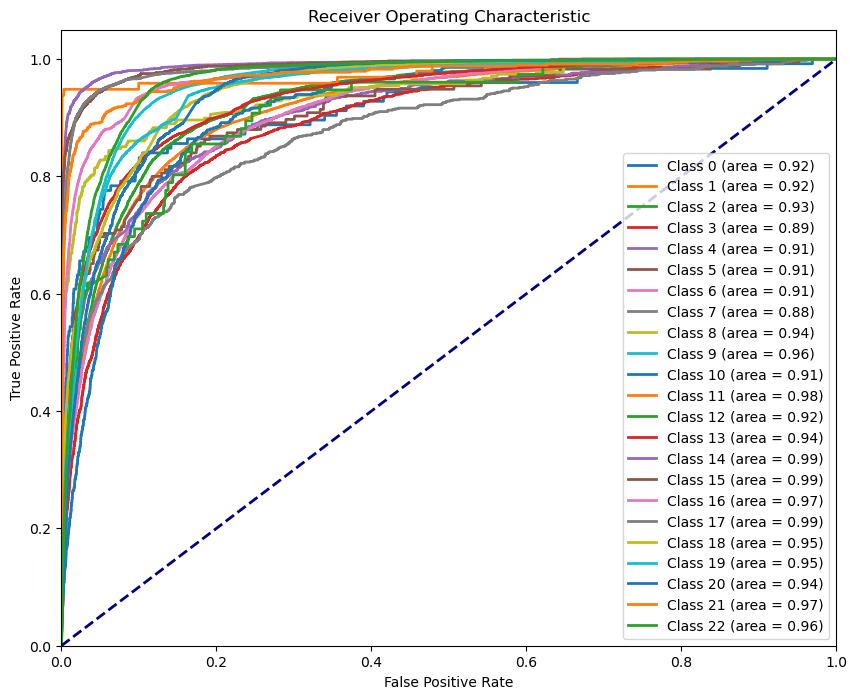

In [43]:
# Бинаризация меток для многоклассовой классификации
y_test_binarized2 = label_binarize(y_test2, classes=np.unique(labels2))

# Предсказание вероятностей для всех классов
y_score2 = model2.predict_proba(X_test2)

# Вычисление параметров ROC-кривых для каждого класса
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()
for i in range(y_test_binarized2.shape[1]):
    fpr2[i], tpr2[i], _ = roc_curve(y_test_binarized2[:, i], y_score2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Построение ROC-кривых для всех классов
plt.figure(figsize=(10, 8))

#classes_to_see2 = [0,1, 2, 3, 4]
for i in range(y_test_binarized2.shape[1]): # classes_to_see2
    plt.plot(fpr2[i], tpr2[i], lw=2, label='Class {} (area = {:.2f})'.format(i, roc_auc2[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



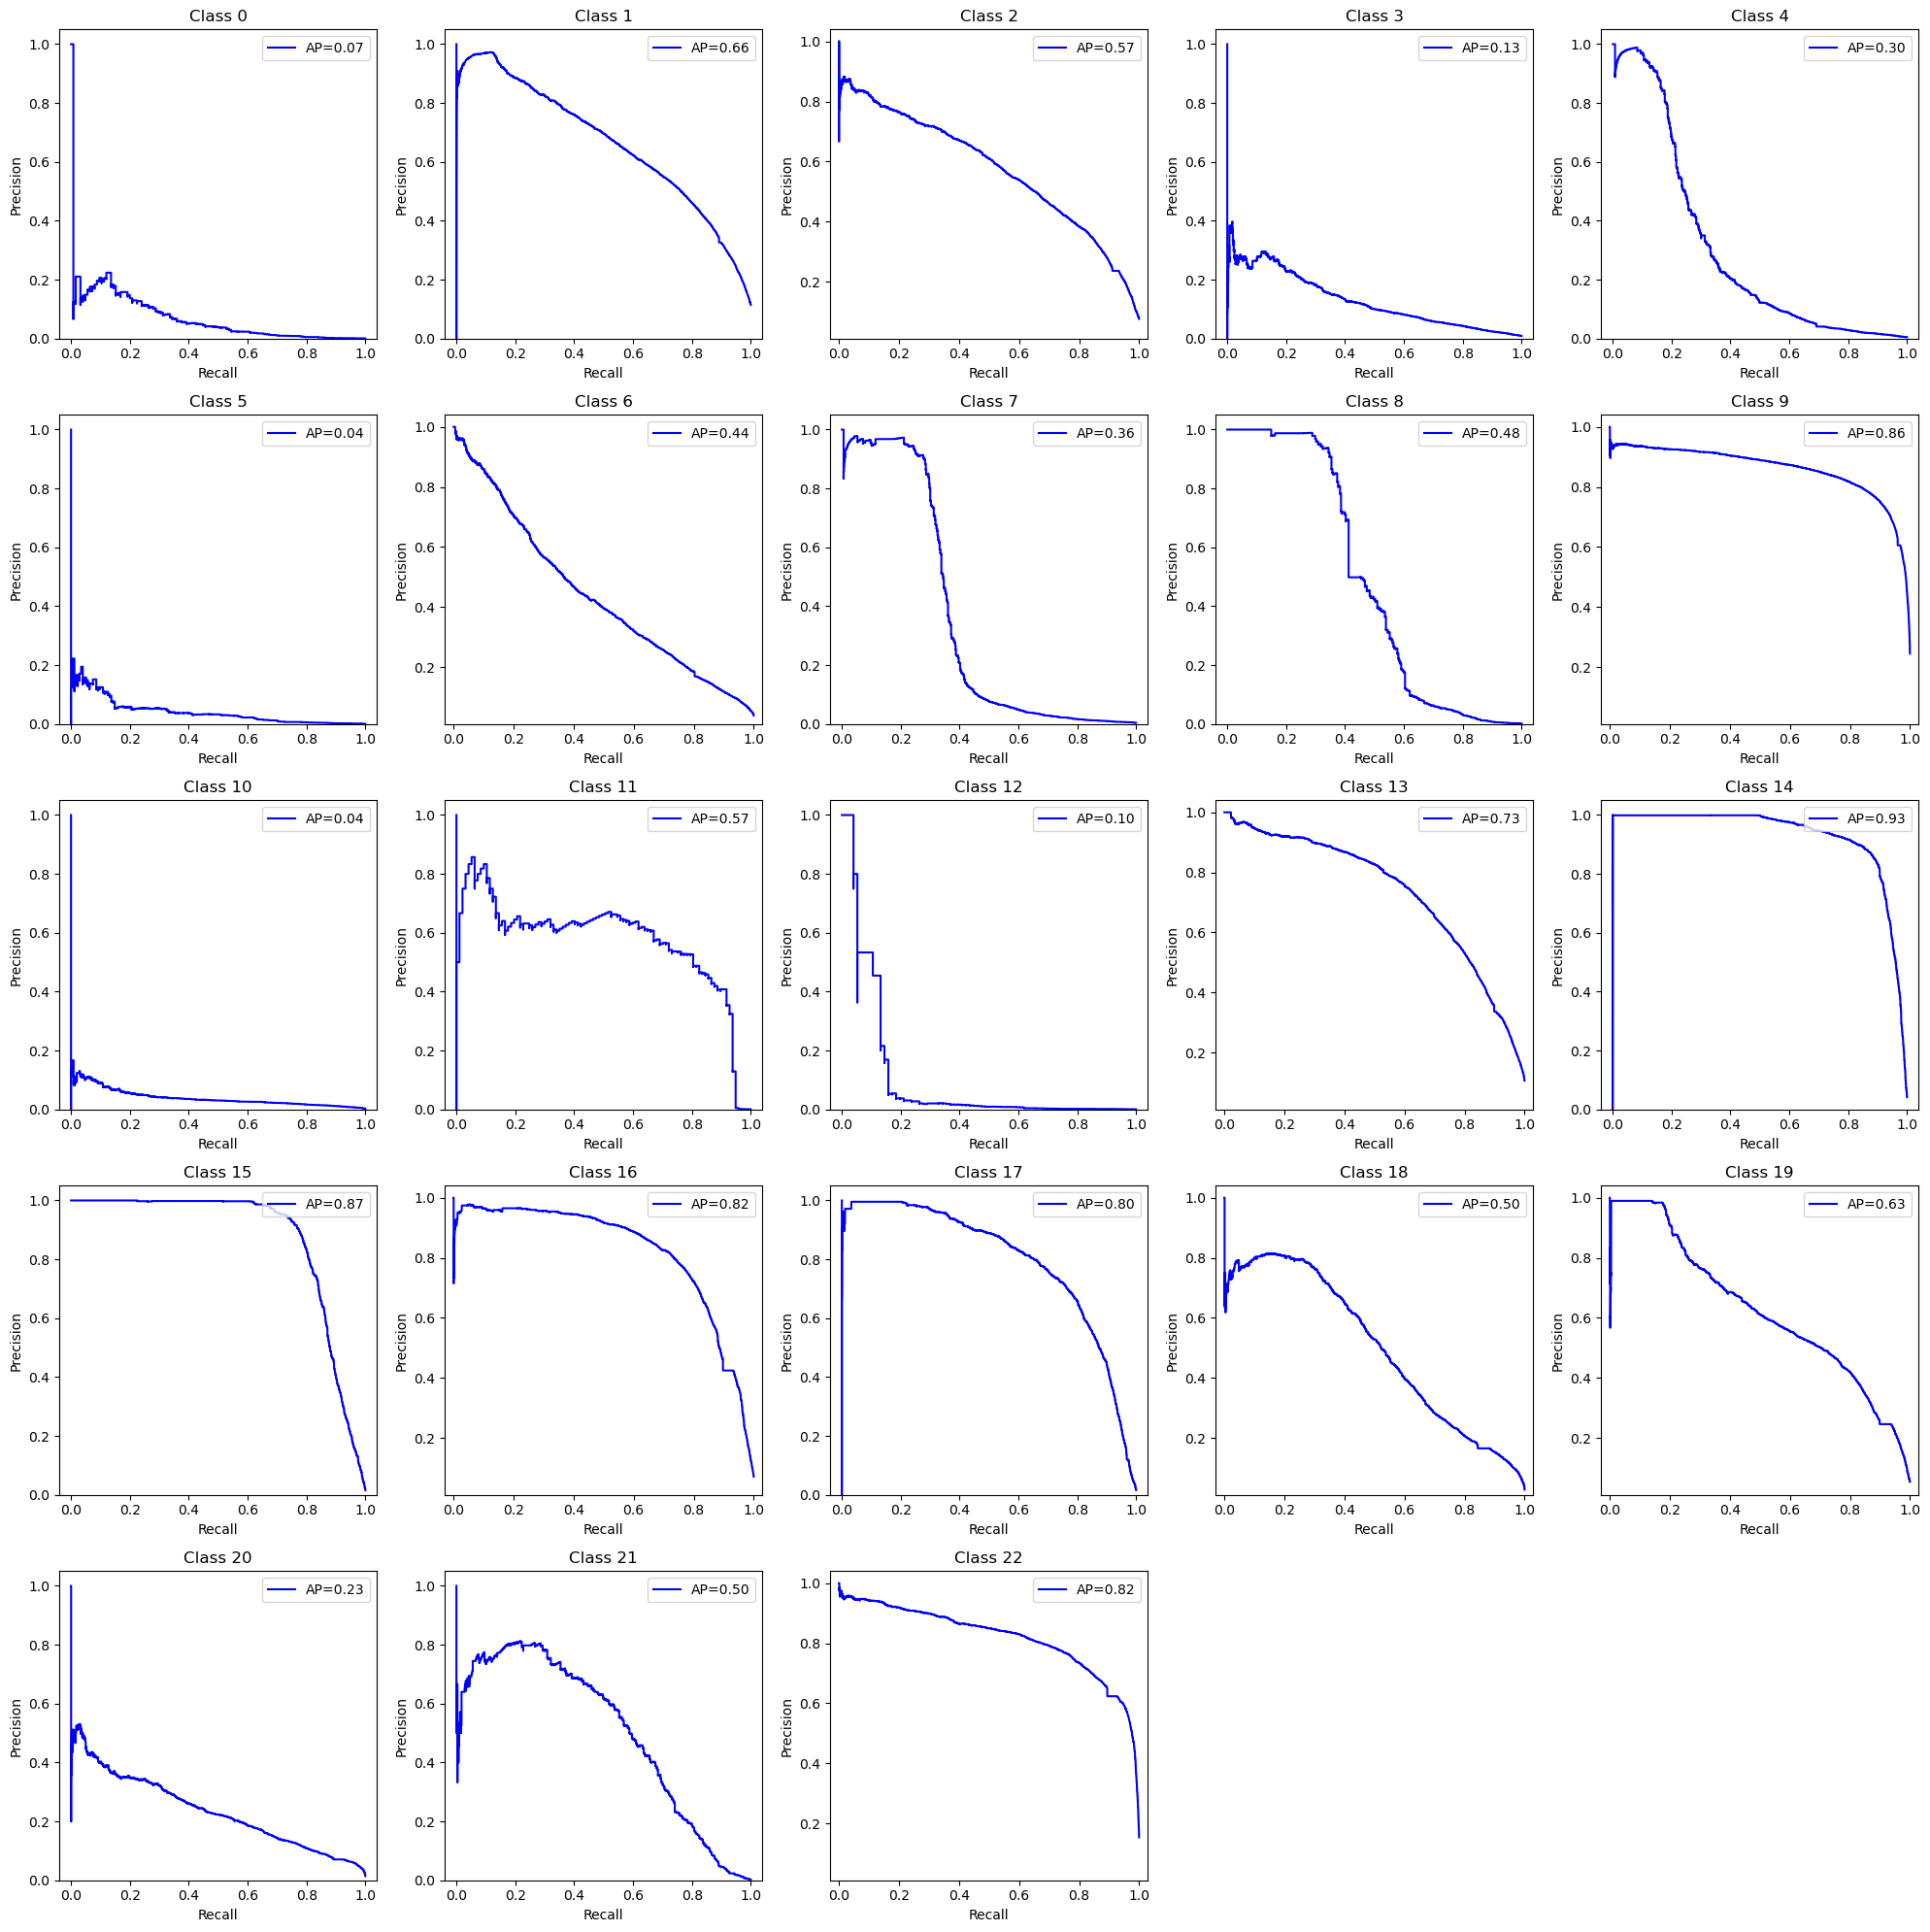

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Предполагается, что y_test_binarized и y_score уже вычислены
n_classes2 = y_test_binarized2.shape[1]  # количество классов

# Инициализация словарей
precision2 = dict()
recall2 = dict()
average_precision2 = dict()

# Расчет точности и полноты для каждого класса
for i in range(n_classes2):
    precision2[i], recall2[i], _ = precision_recall_curve(y_test_binarized2[:, i], y_score2[:, i])
    average_precision2[i] = average_precision_score(y_test_binarized2[:, i], y_score2[:, i])

# Выбор размера сетки подграфиков в зависимости от количества классов
rows2 = int(np.ceil(n_classes2 / 5))  # Допустим, мы хотим до 6 графиков в ряд
cols2 = 5

# Создание фигуры для подграфиков
figsize_per_subplot2 = 4  # Задаем желаемую ширину и высоту каждого подграфика
fig2, axes2 = plt.subplots(rows2, cols2, figsize=(figsize_per_subplot2 * cols2, figsize_per_subplot2 * rows2))

for i, ax in enumerate(axes2.flatten()):
    if i < n_classes2:
        ax.step(recall2[i], precision2[i], where='post', color='b', label=f'AP={average_precision2[i]:.2f}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(f'Class {i}')
        ax.legend(loc="upper right")
        ax.set_aspect('equal', adjustable='datalim')
    else:
        ax.set_visible(False)  # Скрываем лишние подграфики, если они есть

# Если количество классов не заполняет всю сетку, остальные подграфики можно очистить
for i in range(n_classes2, rows2 * cols2):
    fig2.delaxes(axes2.flatten()[i])

plt.tight_layout()
plt.show()


#### 2.5_steps

In [45]:
labels3 = t['2.5_steps']

In [46]:
len(set(labels3))

30

In [47]:
from sklearn.model_selection import train_test_split

X_train3, X_test3, y_train3, y_test3 = train_test_split(list(save_frame['embedding']), labels3, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
model3 = LogisticRegression(multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model3.fit(X_train3, y_train3)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2358.360780239105 seconds ---


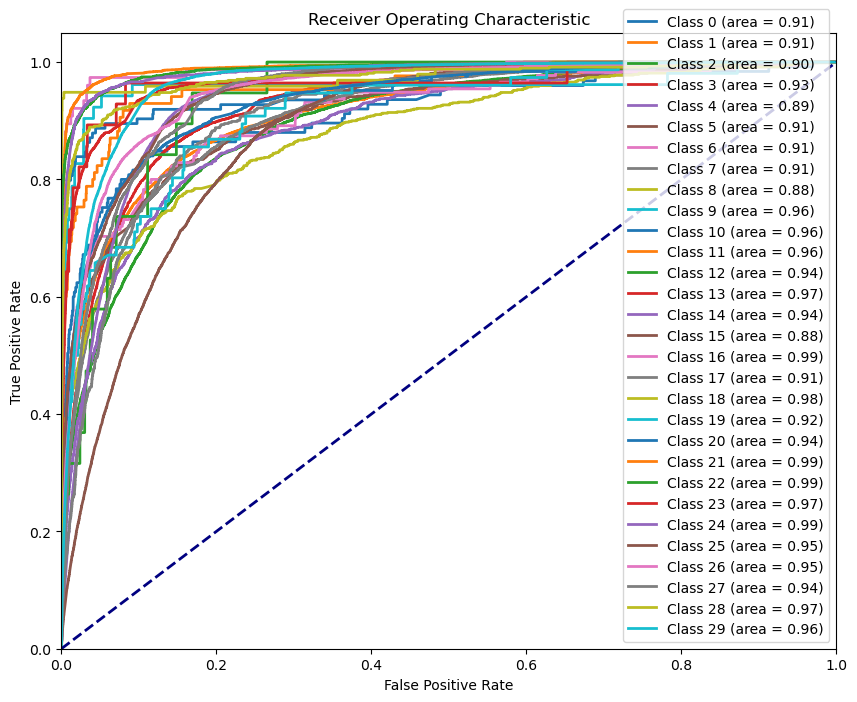

In [49]:
# Бинаризация меток для многоклассовой классификации
y_test_binarized3 = label_binarize(y_test3, classes=np.unique(labels3))

# Предсказание вероятностей для всех классов
y_score3 = model3.predict_proba(X_test3)

# Вычисление параметров ROC-кривых для каждого класса
fpr3 = dict()
tpr3 = dict()
roc_auc3 = dict()
for i in range(y_test_binarized3.shape[1]):
    fpr3[i], tpr3[i], _ = roc_curve(y_test_binarized3[:, i], y_score3[:, i])
    roc_auc3[i] = auc(fpr3[i], tpr3[i])

# Построение ROC-кривых для всех классов
plt.figure(figsize=(10, 8))

#classes_to_see2 = [0,1, 2, 3, 4]
for i in range(y_test_binarized3.shape[1]): # classes_to_see2
    plt.plot(fpr3[i], tpr3[i], lw=2, label='Class {} (area = {:.2f})'.format(i, roc_auc3[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



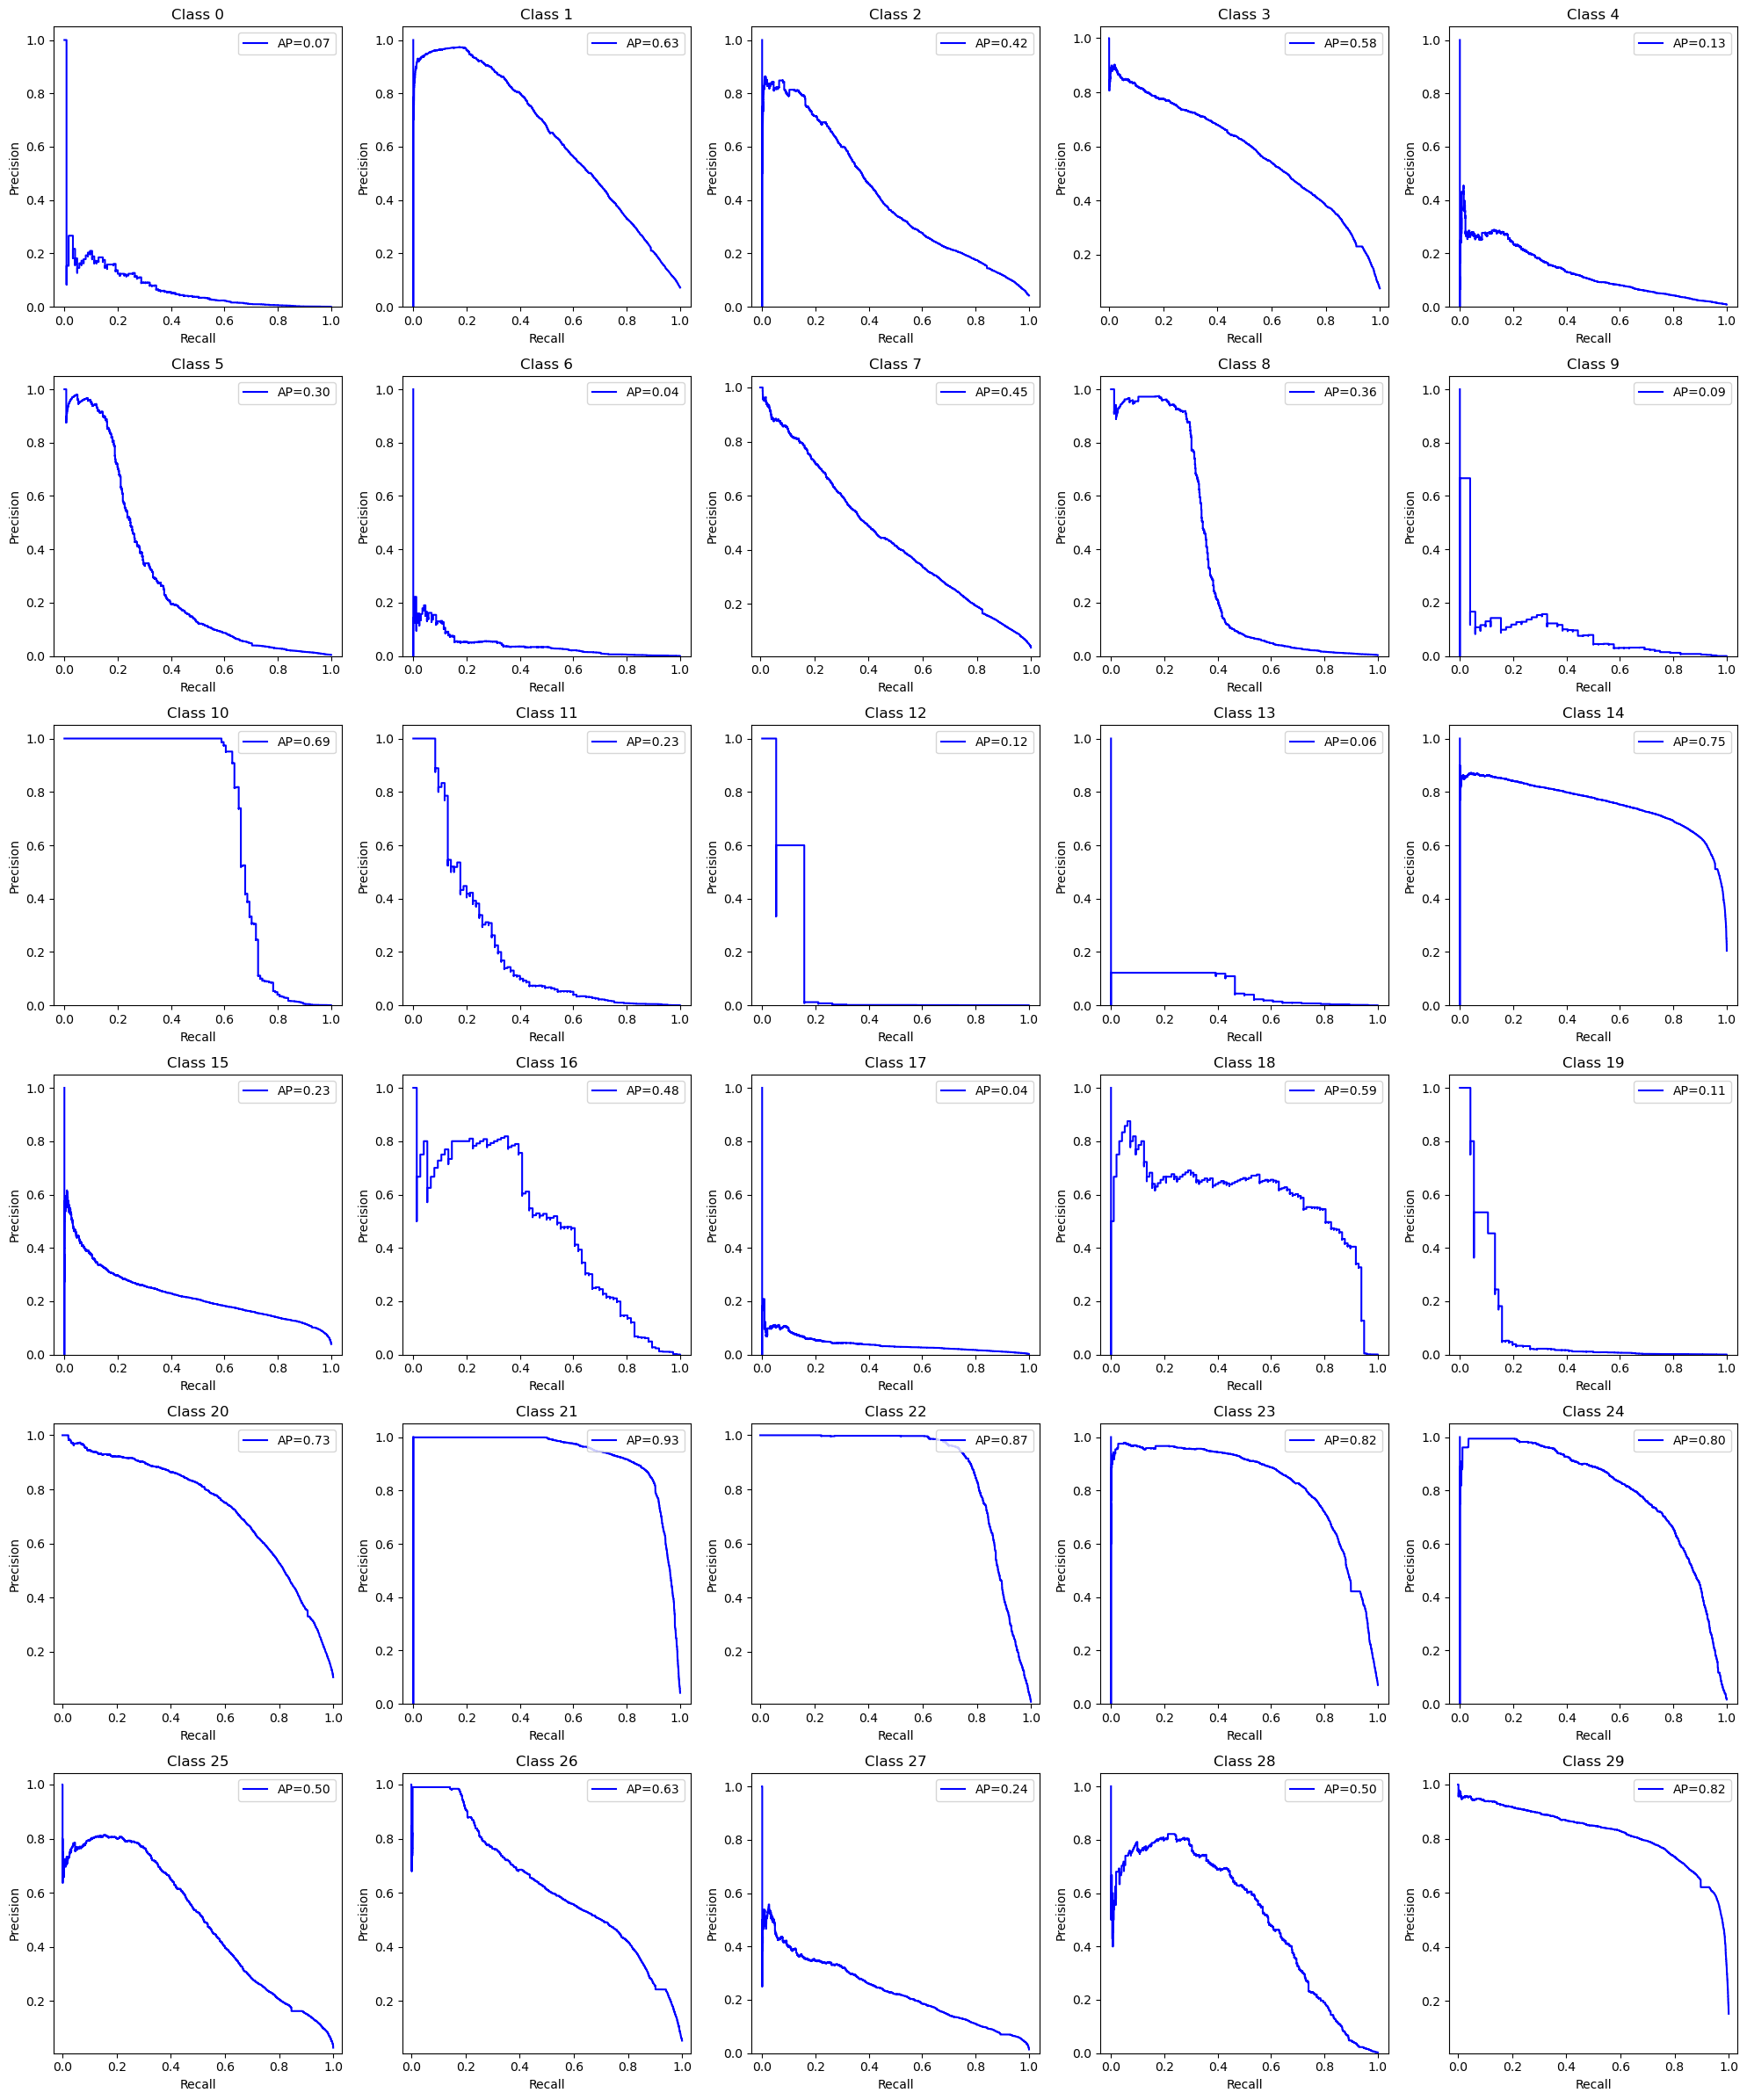

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
import numpy as np

# Предполагается, что y_test_binarized и y_score уже вычислены
n_classes3 = y_test_binarized3.shape[1]  # количество классов

# Инициализация словарей
precision3 = dict()
recall3 = dict()
average_precision3 = dict()

# Расчет точности и полноты для каждого класса
for i in range(n_classes3):
    precision3[i], recall3[i], _ = precision_recall_curve(y_test_binarized3[:, i], y_score3[:, i])
    average_precision3[i] = average_precision_score(y_test_binarized3[:, i], y_score3[:, i])

# Выбор размера сетки подграфиков в зависимости от количества классов
rows3 = int(np.ceil(n_classes3 / 5))  # Допустим, мы хотим до 6 графиков в ряд
cols3 = 5

# Создание фигуры для подграфиков
figsize_per_subplot3 = 4  # Задаем желаемую ширину и высоту каждого подграфика
fig3, axes3 = plt.subplots(rows3, cols3, figsize=(figsize_per_subplot3 * cols3, figsize_per_subplot3 * rows3))

for i, ax in enumerate(axes3.flatten()):
    if i < n_classes3:
        ax.step(recall3[i], precision3[i], where='post', color='b', label=f'AP={average_precision3[i]:.2f}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(f'Class {i}')
        ax.legend(loc="upper right")
        ax.set_aspect('equal', adjustable='datalim')
    else:
        ax.set_visible(False)  # Скрываем лишние подграфики, если они есть

# Если количество классов не заполняет всю сетку, остальные подграфики можно очистить
for i in range(n_classes3, rows3 * cols3):
    fig3.delaxes(axes3.flatten()[i])

plt.tight_layout()
plt.show()


#### 3_steps

In [51]:
labels4 = t['3_steps']

In [52]:
len(set(labels4))

71

In [53]:
from sklearn.model_selection import train_test_split

X_train4, X_test4, y_train4, y_test4 = train_test_split(list(save_frame['embedding']), labels4, test_size=0.2, random_state=42)

In [54]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
model4 = LogisticRegression(multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model4.fit(X_train4, y_train4)
print("--- %s seconds ---" % (time.time() - start_time))

--- 5380.754549264908 seconds ---


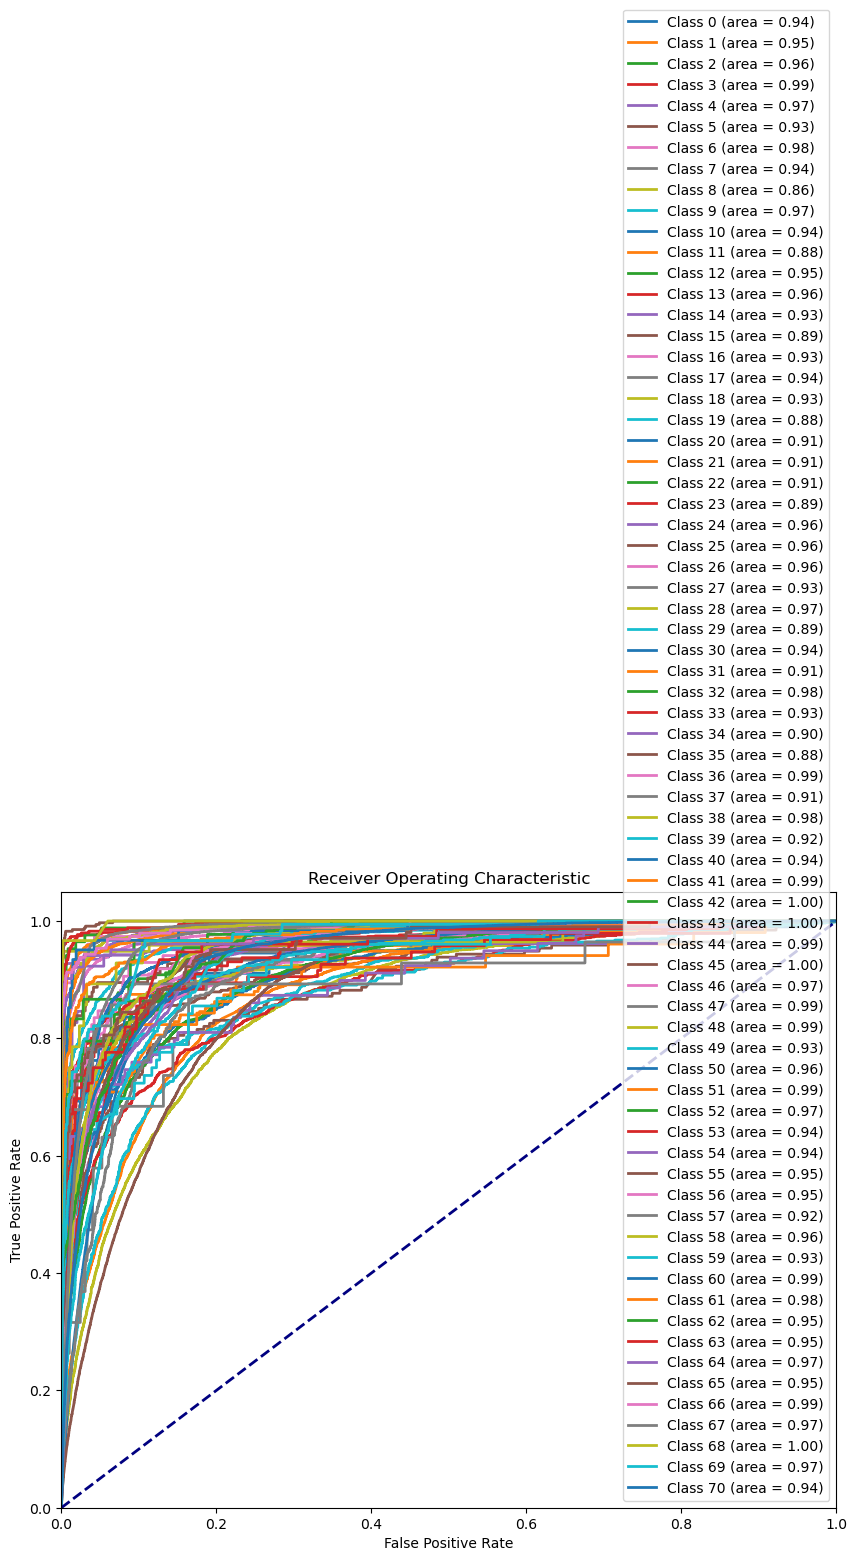

In [55]:
# Бинаризация меток для многоклассовой классификации
y_test_binarized4 = label_binarize(y_test4, classes=np.unique(labels4))

# Предсказание вероятностей для всех классов
y_score4= model4.predict_proba(X_test4)

# Вычисление параметров ROC-кривых для каждого класса
fpr4 = dict()
tpr4 = dict()
roc_auc4 = dict()
for i in range(y_test_binarized4.shape[1]):
    fpr4[i], tpr4[i], _ = roc_curve(y_test_binarized4[:, i], y_score4[:, i])
    roc_auc4[i] = auc(fpr4[i], tpr4[i])

# Построение ROC-кривых для всех классов
plt.figure(figsize=(10, 8))

#classes_to_see2 = [0,1, 2, 3, 4]
for i in range(y_test_binarized4.shape[1]): # classes_to_see2
    plt.plot(fpr4[i], tpr4[i], lw=2, label='Class {} (area = {:.2f})'.format(i, roc_auc4[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

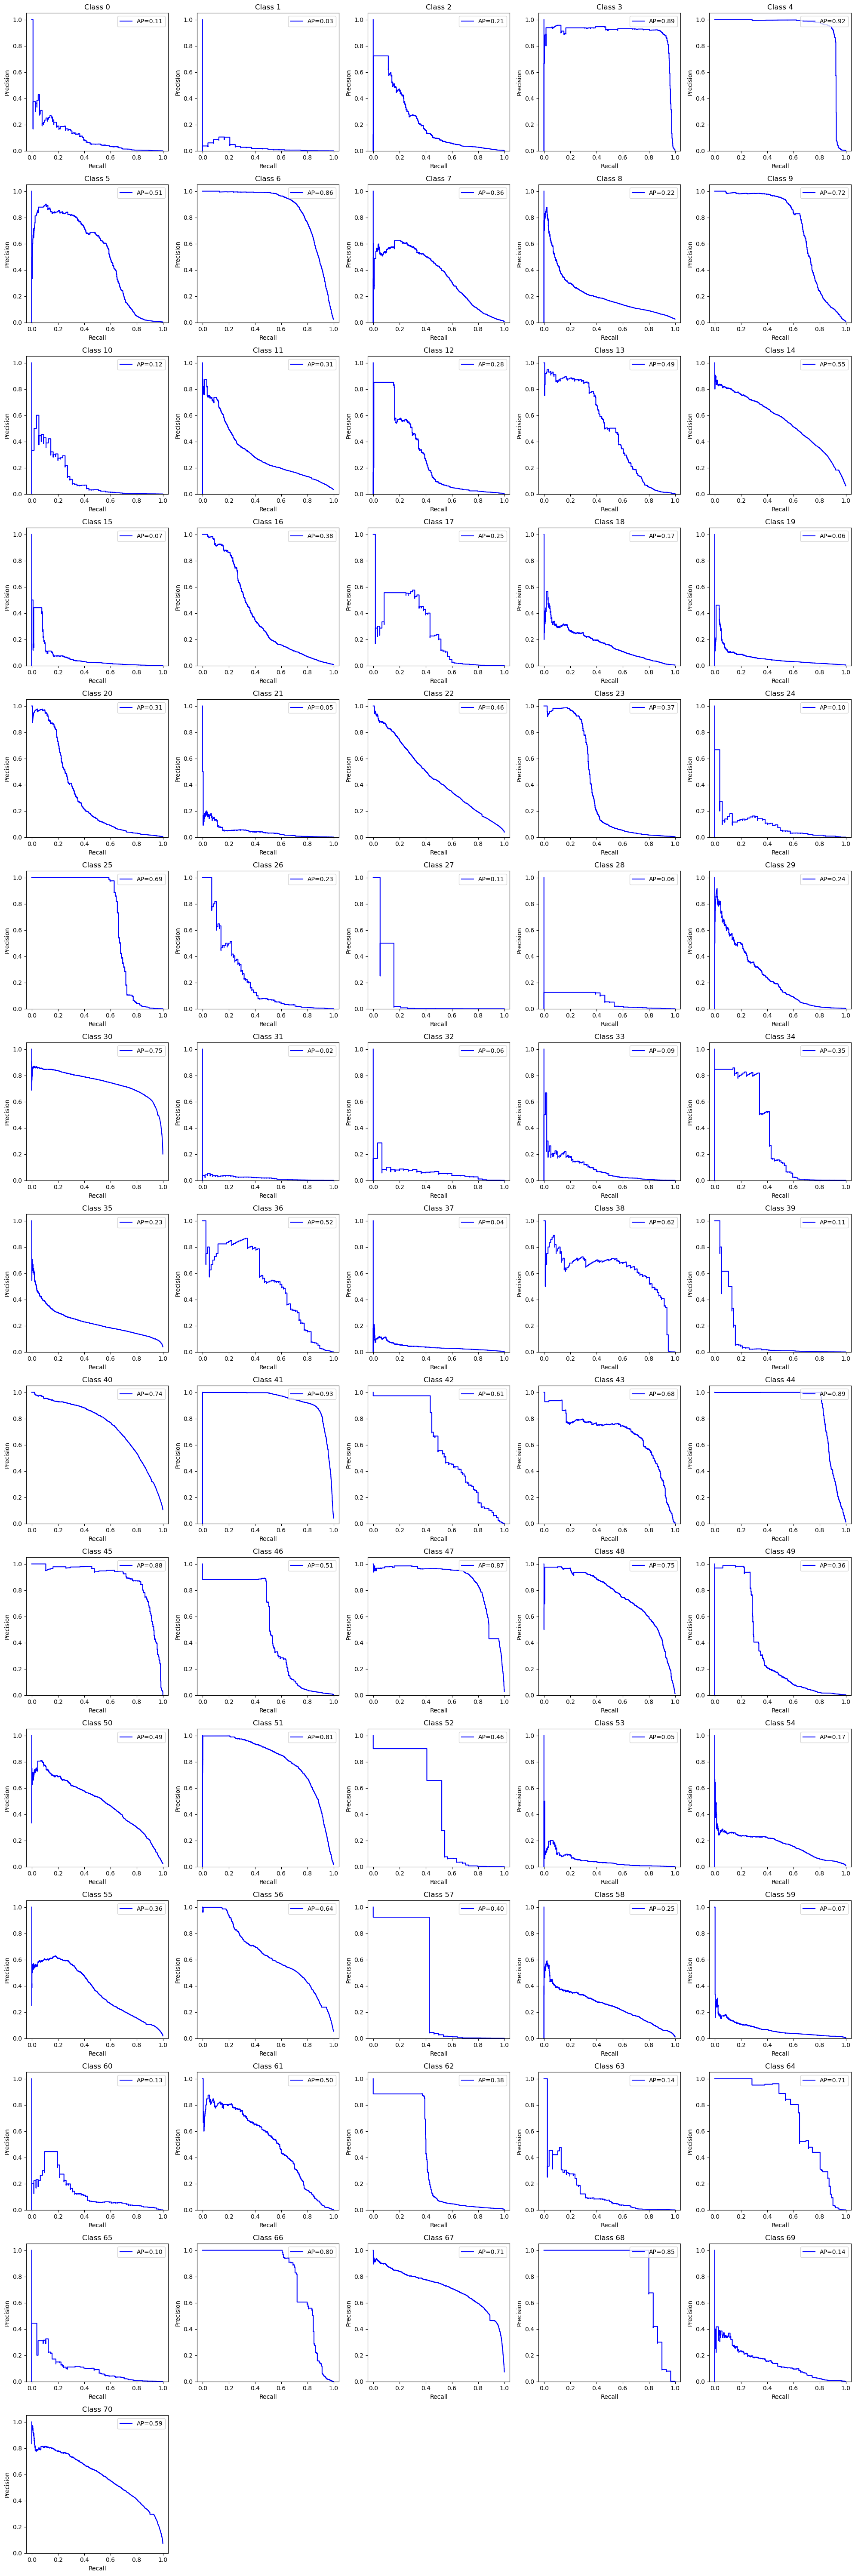

In [56]:
# Инициализация словарей
precision4 = dict()
recall4 = dict()
average_precision4 = dict()

n_classes4 = y_test_binarized4.shape[1]  # количество классов

# Расчет точности и полноты для каждого класса
for i in range(n_classes4):
    precision4[i], recall4[i], _ = precision_recall_curve(y_test_binarized4[:, i], y_score4[:, i])
    average_precision4[i] = average_precision_score(y_test_binarized4[:, i], y_score4[:, i])

# Выбор размера сетки подграфиков в зависимости от количества классов
rows4 = int(np.ceil(n_classes4 / 5))  # Допустим, мы хотим до 6 графиков в ряд
cols4 = 5

# Создание фигуры для подграфиков
figsize_per_subplot4 = 4  # Задаем желаемую ширину и высоту каждого подграфика
fig4, axes4 = plt.subplots(rows4, cols4, figsize=(figsize_per_subplot4 * cols4, figsize_per_subplot4 * rows4))

for i, ax in enumerate(axes4.flatten()):
    if i < n_classes4:
        ax.step(recall4[i], precision4[i], where='post', color='b', label=f'AP={average_precision4[i]:.2f}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(f'Class {i}')
        ax.legend(loc="upper right")
        ax.set_aspect('equal', adjustable='datalim')
    else:
        ax.set_visible(False)  # Скрываем лишние подграфики, если они есть

# Если количество классов не заполняет всю сетку, остальные подграфики можно очистить
for i in range(n_classes4, rows4 * cols4):
    fig4.delaxes(axes4.flatten()[i])

plt.tight_layout()
plt.show()

#### 4_steps не почистил классы, остановил вычисление, т.к. несколько часов считалось

In [57]:
labels5 = t['4_steps']

In [58]:
from sklearn.model_selection import train_test_split

X_train5, X_test5, y_train5, y_test5 = train_test_split(list(save_frame['embedding']), labels5, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
model5 = LogisticRegression(multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model5.fit(X_train5, y_train5)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
# Бинаризация меток для многоклассовой классификации
y_test_binarized5 = label_binarize(y_test5, classes=np.unique(labels5))

# Предсказание вероятностей для всех классов
y_score5= model5.predict_proba(X_test5)

# Вычисление параметров ROC-кривых для каждого класса
fpr5 = dict()
tpr5 = dict()
roc_auc5 = dict()
for i in range(y_test_binarized5.shape[1]):
    fpr5[i], tpr5[i], _ = roc_curve(y_test_binarized5[:, i], y_score5[:, i])
    roc_auc5[i] = auc(fpr5[i], tpr5[i])

# Построение ROC-кривых для всех классов
plt.figure(figsize=(10, 8))

#classes_to_see2 = [0,1, 2, 3, 5]
for i in range(y_test_binarized5.shape[1]): # classes_to_see2
    plt.plot(fpr5[i], tpr5[i], lw=2, label='Class {} (area = {:.2f})'.format(i, roc_auc5[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Инициализация словарей
precision5 = dict()
recall5 = dict()
average_precision5 = dict()

n_classes5 = y_test_binarized5.shape[1]  # количество классов

# Расчет точности и полноты для каждого класса
for i in range(n_classes5):
    precision5[i], recall5[i], _ = precision_recall_curve(y_test_binarized5[:, i], y_score5[:, i])
    average_precision5[i] = average_precision_score(y_test_binarized5[:, i], y_score5[:, i])

# Выбор размера сетки подграфиков в зависимости от количества классов
rows5 = int(np.ceil(n_classes5 / 5))  # Допустим, мы хотим до 6 графиков в ряд
cols5 = 5

# Создание фигуры для подграфиков
figsize_per_subplot5 = 5  # Задаем желаемую ширину и высоту каждого подграфика
fig5, axes5 = plt.subplots(rows5, cols5, figsize=(figsize_per_subplot5 * cols5, figsize_per_subplot5 * rows5))

for i, ax in enumerate(axes5.flatten()):
    if i < n_classes5:
        ax.step(recall5[i], precision5[i], where='post', color='b', label=f'AP={average_precision5[i]:.2f}')
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_ylim([0.0, 1.05])
        ax.set_xlim([0.0, 1.0])
        ax.set_title(f'Class {i}')
        ax.legend(loc="upper right")
        ax.set_aspect('equal', adjustable='datalim')
    else:
        ax.set_visible(False)  # Скрываем лишние подграфики, если они есть

# Если количество классов не заполняет всю сетку, остальные подграфики можно очистить
for i in range(n_classes5, rows5 * cols5):
    fig5.delaxes(axes5.flatten()[i])

plt.tight_layout()
plt.show()
